In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/juanquecan94/Diplomado/master/Aplicacion/Data/kc_house_data.csv")
data.drop(["id","zipcode","lat","long"], axis=1,inplace=True)

In [4]:
data.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3       1.00         1180      5650   
1  20141209T000000  538000.0         3       2.25         2570      7242   
2  20150225T000000  180000.0         2       1.00          770     10000   
3  20141209T000000  604000.0         4       3.00         1960      5000   
4  20150218T000000  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   
1     2.0           0     0          3      7        2170            400   
2     1.0           0     0          3      6         770              0   
3     1.0           0     0          5      7        1050            910   
4     1.0           0     0          3      8        1680              0   

   yr_built  yr_renovated  sqft_living15  sqft_lot15  
0      1955             0           1340        5650  
1      1951          1991           1690        7639  
2      1933             0           2720        8062  
3      1965             0           1360        5000  
4      1987             0           1800        7503

In [5]:
data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated  sqft_living15  \
count  21613.000000   21613.000000  21613.000000  21613.000000   21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258    1986.552492   
std      828.090978     442.575043     29.373411    401.679240     685.391304   
min      290.000000       0.000000   1900.000000      0.000000     399.000000   
25%     1190.000000       0.000000   1951.000000      0.000000    1490.000000   
50%     1560.000000       0.000000   1975.000000      0.000000    1840.000000   
75%     2210.000000     560.000000   1997.000000      0.000000    2360.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000    6210.000000   

          sqft_lot15  
count   21613.000000  
mean    12768.455652  
std     27304.179631  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000

In [6]:
data.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [7]:
data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [8]:
data.price.value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

<AxesSubplot:xlabel='floors', ylabel='count'>

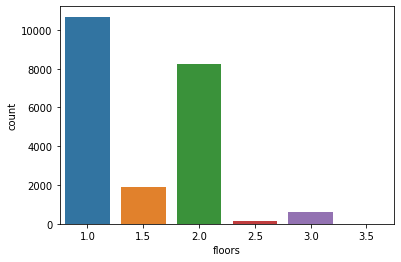

In [9]:
sb.countplot(x='floors',data=data)

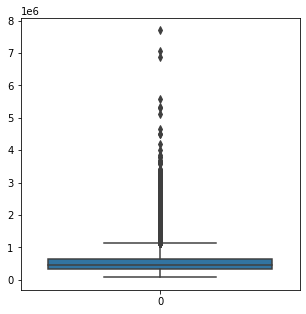

In [10]:
sb.boxplot(data=data['price'])
fig=plt.gcf()
fig.set_size_inches(5,5)

<AxesSubplot:xlabel='floors', ylabel='price'>

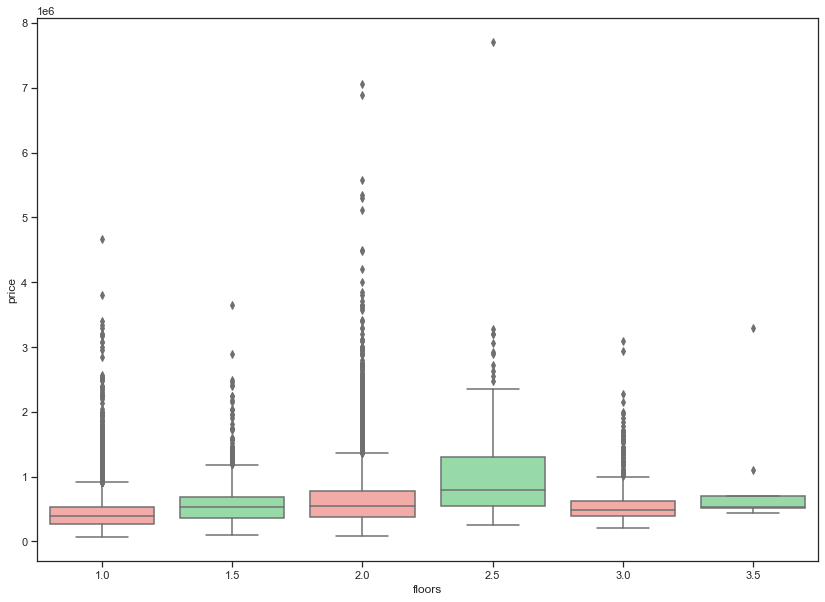

In [11]:
sb.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sb.boxplot(x='floors',y='price',palette=["r", "g"], data=data,ax=ax)

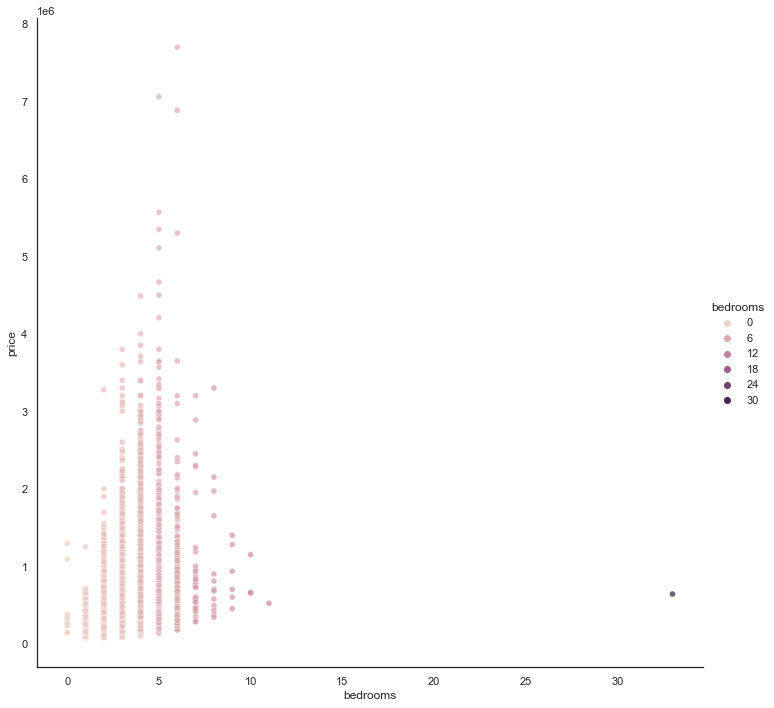

In [12]:
sb.set(style='white')
sb.relplot(x='bedrooms',y='price',hue='bedrooms',alpha=0.7,height=10,data=data)

In [15]:
data=data[data['bedrooms']!=33]

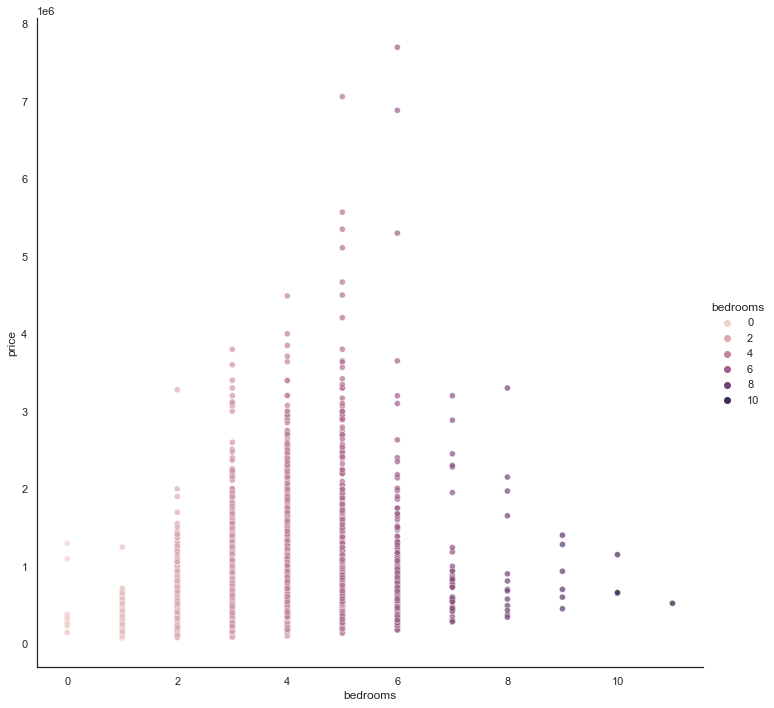

In [16]:
sb.set(style='white')
sb.relplot(x='bedrooms',y='price',hue='bedrooms',alpha=0.7,height=10,data=data)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

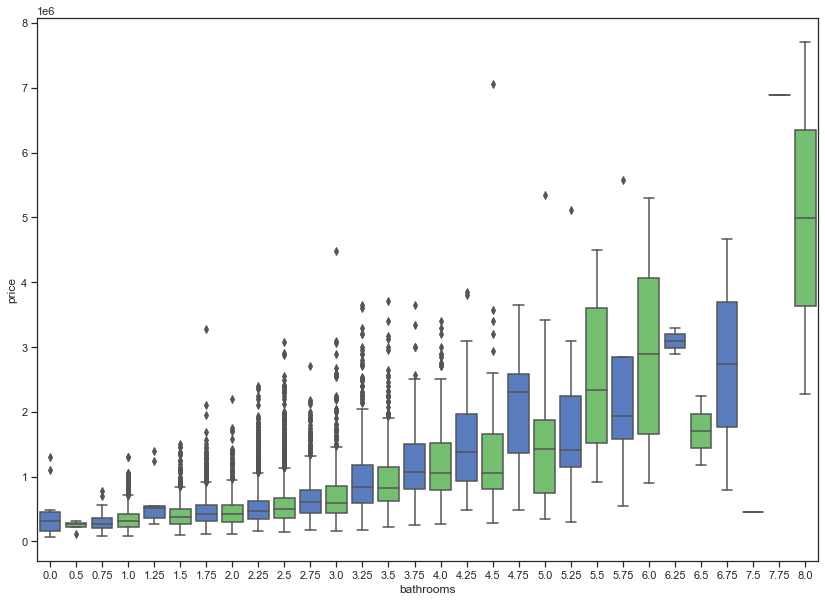

In [17]:
sb.set(style='ticks',palette='muted')
fig,ax=plt.subplots(figsize=(14,10))
sb.boxplot(x='bathrooms',y='price',palette=["b", "g"],data=data,ax=ax)

In [18]:
data.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.315445   0.525147     0.702047  0.089664  0.256811   
bedrooms       0.315445  1.000000   0.529159     0.591467  0.032807  0.181085   
bathrooms      0.525147  0.529159   1.000000     0.754663  0.087735  0.500645   
sqft_living    0.702047  0.591467   0.754663     1.000000  0.172822  0.353937   
sqft_lot       0.089664  0.032807   0.087735     0.172822  1.000000 -0.005210   
floors         0.256811  0.181085   0.500645     0.353937 -0.005210  1.000000   
waterfront     0.266371 -0.006611   0.063742     0.103816  0.021603  0.023695   
view           0.397299  0.081930   0.187732     0.284606  0.074707  0.029432   
condition      0.036336  0.025478  -0.124946    -0.058704 -0.008935 -0.263706   
grade          0.667447  0.366502   0.664979     0.762701  0.113616  0.458171   
sqft_above     0.605591  0.490600   0.685339     0.876597  0.183507  0.523866   
sqft_basement  0.323812  0.309490   0.283789     0.435065  0.015293 -0.245684   
yr_built       0.054023  0.159167   0.506012     0.318037  0.053073  0.489302   
yr_renovated   0.126437  0.019617   0.050735     0.055358  0.007641  0.006330   
sqft_living15  0.585404  0.402626   0.568628     0.756419  0.144602  0.279856   
sqft_lot15     0.082451  0.030402   0.087170     0.183280  0.718556 -0.011282   

               waterfront      view  condition     grade  sqft_above  \
price            0.266371  0.397299   0.036336  0.667447    0.605591   
bedrooms        -0.006611  0.081930   0.025478  0.366502    0.490600   
bathrooms        0.063742  0.187732  -0.124946  0.664979    0.685339   
sqft_living      0.103816  0.284606  -0.058704  0.762701    0.876597   
sqft_lot         0.021603  0.074707  -0.008935  0.113616    0.183507   
floors           0.023695  0.029432  -0.263706  0.458171    0.523866   
waterfront       1.000000  0.401857   0.016665  0.082773    0.072072   
view             0.401857  1.000000   0.046031  0.251315    0.167640   
condition        0.016665  0.046031   1.000000 -0.144632   -0.158136   
grade            0.082773  0.251315  -0.144632  1.000000    0.755919   
sqft_above       0.072072  0.167640  -0.158136  0.755919    1.000000   
sqft_basement    0.080591  0.276959   0.174057  0.168412   -0.051918   
yr_built        -0.026165 -0.053452  -0.361380  0.446952    0.423879   
yr_renovated     0.092884  0.103915  -0.060602  0.014409    0.023276   
sqft_living15    0.086461  0.280432  -0.092731  0.713198    0.731860   
sqft_lot15       0.030702  0.072571  -0.003373  0.119241    0.194042   

               sqft_basement  yr_built  yr_renovated  sqft_living15  \
price               0.323812  0.054023      0.126437       0.585404   
bedrooms            0.309490  0.159167      0.019617       0.402626   
bathrooms           0.283789  0.506012      0.050735       0.568628   
sqft_living         0.435065  0.318037      0.055358       0.756419   
sqft_lot            0.015293  0.053073      0.007641       0.144602   
floors             -0.245684  0.489302      0.006330       0.279856   
waterfront          0.080591 -0.026165      0.092884       0.086461   
view                0.276959 -0.053452      0.103915       0.280432   
condition           0.174057 -0.361380     -0.060602      -0.092731   
grade               0.168412  0.446952      0.014409       0.713198   
sqft_above         -0.051918  0.423879      0.023276       0.731860   
sqft_basement       1.000000 -0.133103      0.071330       0.200390   
yr_built           -0.133103  1.000000     -0.224885       0.326205   
yr_renovated        0.071330 -0.224885      1.000000      -0.002682   
sqft_living15       0.200390  0.326205     -0.002682       1.000000   
sqft_lot15          0.017285  0.070948      0.007851       0.183183   

               sqft_lot15  
price            0.082451  
bedrooms         0.030402  
bathrooms        0.087170  
sqft_living      0.183280  
sqft_lot         0.718556  
floors          -0.011282  
waterfront 

<AxesSubplot:>

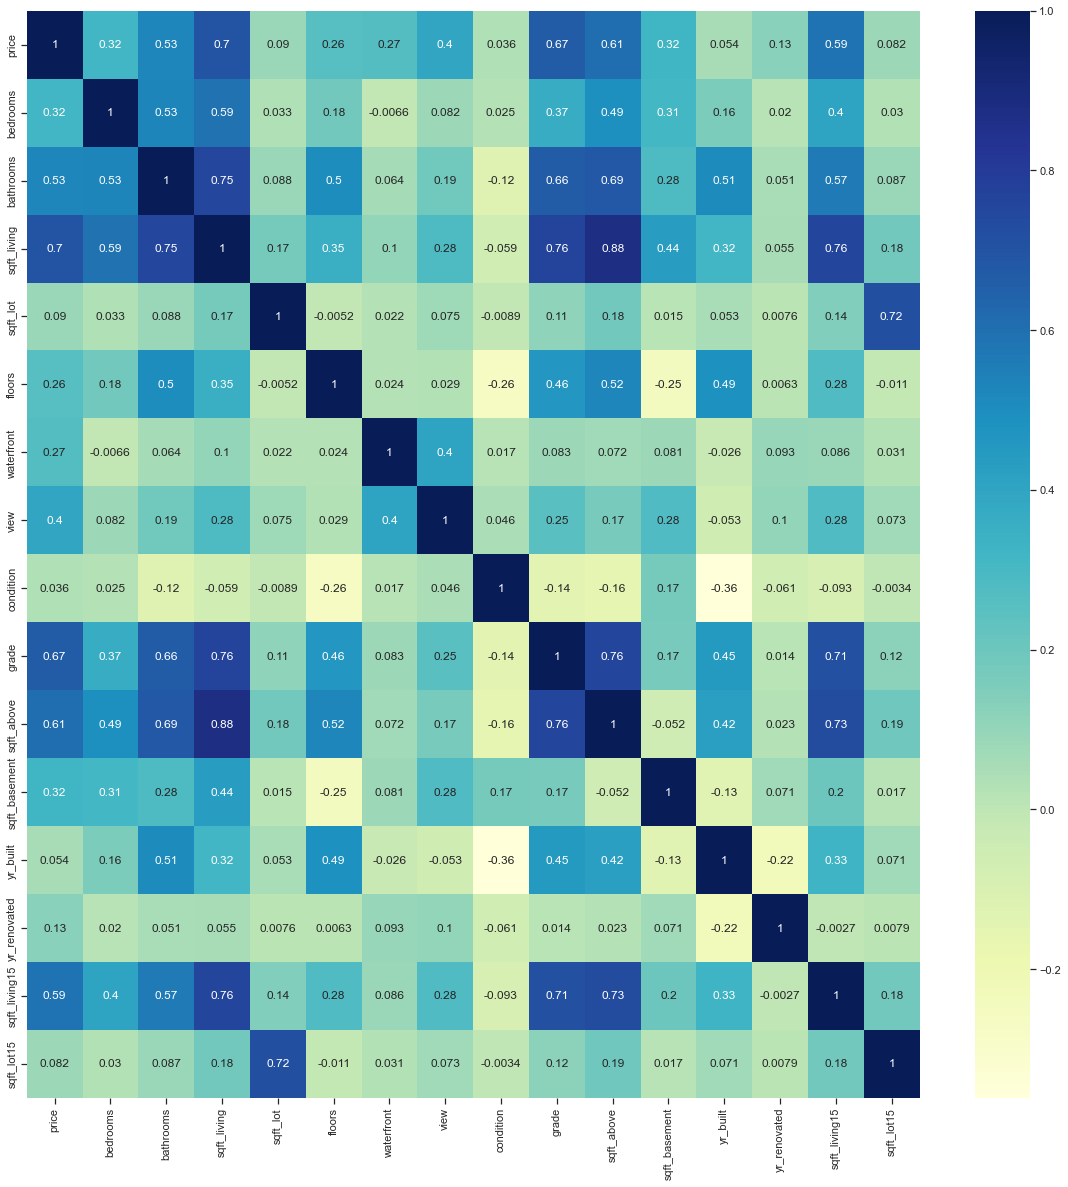

In [20]:
data_hm=data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
     'sqft_living15', 'sqft_lot15']]
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(data.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

bedrooms
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

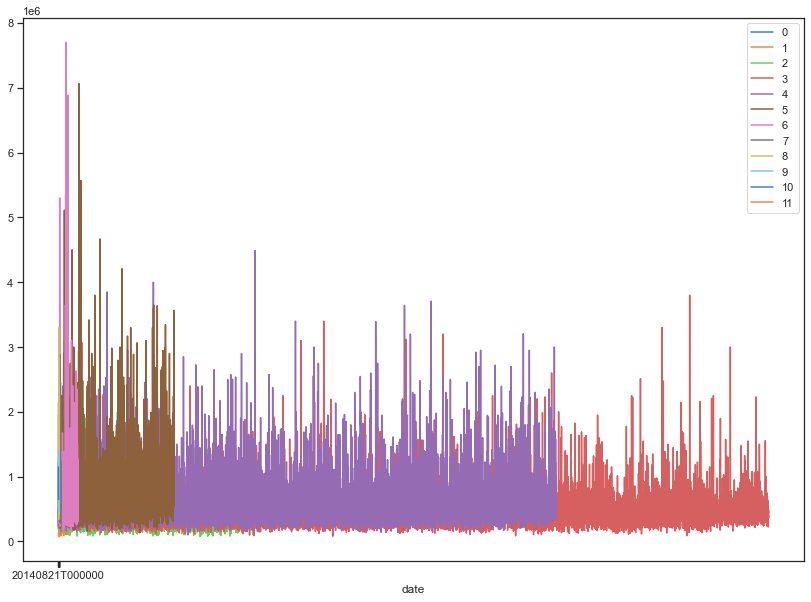

In [21]:
fig,ax=plt.subplots(figsize=(14,10))
data.set_index('date').groupby('bedrooms')['price'].plot(legend=True)

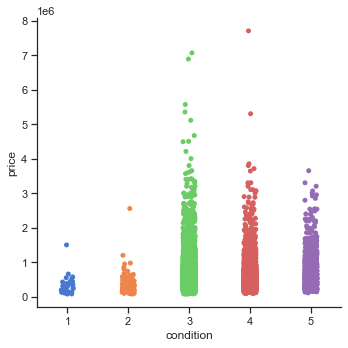

In [22]:
sb.catplot(x='condition',y='price',data=data)

[(0.0, 250000.0)]

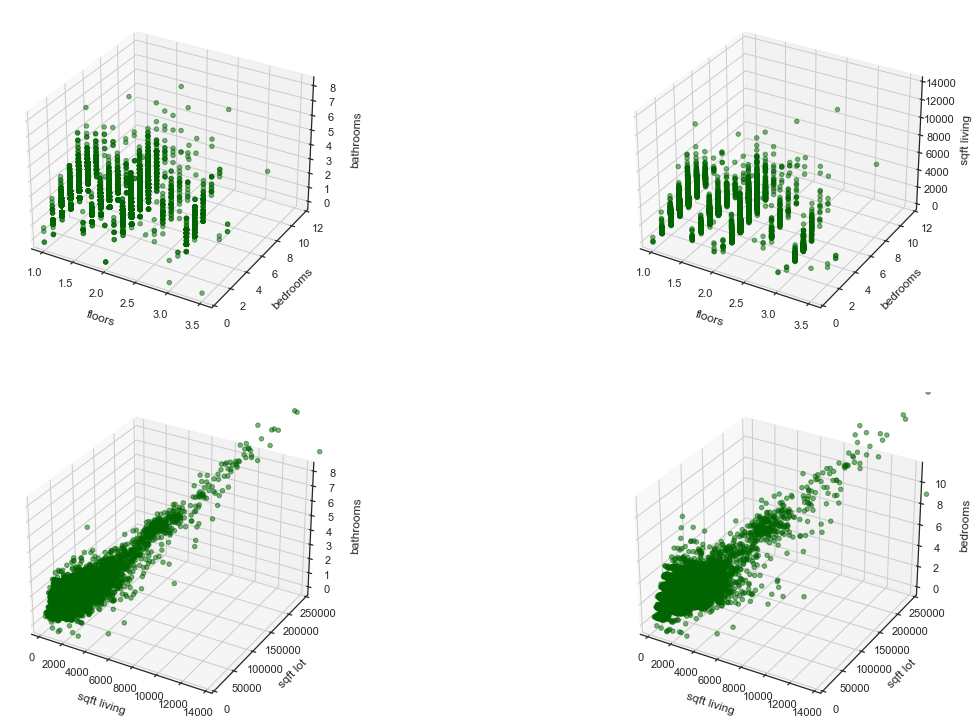

In [23]:
from mpl_toolkits import mplot3d

fig=plt.figure(figsize=(20,13))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(data['floors'],data['bedrooms'],data['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nbathrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(data['floors'],data['bedrooms'],data['sqft_living'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nsqft living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(data['sqft_living'],data['sqft_lot'],data['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nbathrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(data['sqft_living'],data['sqft_lot'],data['bedrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nbedrooms')
ax.set(ylim=[0,250000])

In [24]:
data['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21612, dtype: float64

In [25]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [27]:
data_f= data.dropna()

In [28]:
data_f.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [29]:
X = data_f.drop(["price","date"],axis=1).values #input_data
y = data_f["price"].values #output
print("input shape: ",X.shape)
print("output shape: ",y.shape)

input shape:  (21612, 15)
output shape:  (21612,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)

In [31]:
reg_model = linear_model.LinearRegression()

In [32]:
reg_model.fit(X_train, y_train)
y_predicted = reg_model.predict(X_test)

In [33]:
prediction = pd.DataFrame({'prediction':y_predicted,'Actual':y_test})

In [34]:
print(reg_model.score(X_test,y_test)*100)

66.27636714978222


In [35]:
X = data_f.drop(["price"],axis=1).values
y = data_f["price"].values
print("Entrada: ",X.shape)
print("Salida: ",y.shape)
X, y = make_regression(n_samples=200, random_state=0, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)
regr = MLPRegressor(hidden_layer_sizes=512, solver='adam',
                    max_iter=200, activation='relu',
                    random_state=1,learning_rate='constant',
                    learning_rate_init=0.01,
                    batch_size=2)
regr.fit(X_train, y_train)

Entrada:  (21612, 16)
Salida:  (21612,)


MLPRegressor(batch_size=2, hidden_layer_sizes=512, learning_rate_init=0.01,
             random_state=1)

In [36]:
y_predicted = regr.predict(X_test)
prediction = pd.DataFrame({'prediction':y_predicted,'Actual':y_test})
print(regr.score(X_test,y_test)*100)
print('Error cuadratico medio: %2f'
     % mean_squared_error(y_test,y_predicted))
print('Error cuadratico medio raiz:', np.sqrt(mean_squared_error(y_test, y_predicted)))
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_predicted))

73.49689368448855
Error cuadratico medio: 11909.560039
Error cuadratico medio raiz: 109.13093071750426
Error absoluto medio: 88.17634216211101


In [37]:
X = data_f.drop(["price"],axis=1).values
y = data_f["price"].values
print("Entrada: ",X.shape)
print("Salida: ",y.shape)
X, y = make_regression(n_samples=200, random_state=0, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)
reg = GradientBoostingRegressor(random_state=241, max_depth=3, learning_rate=0.1, n_estimators=100)
reg.fit(X_train, y_train)

Entrada:  (21612, 16)
Salida:  (21612,)


GradientBoostingRegressor(random_state=241)

In [38]:
y_predicted = reg.predict(X_test)
prediction = pd.DataFrame({'prediction':y_predicted,'Actual':y_test})
print(reg.score(X_test,y_test)*100)
print('Error medio cuadrado: %2f'
     % mean_squared_error(y_test,y_predicted))
print('Error cuadrático medio de la raíz:', np.sqrt(mean_squared_error(y_test, y_predicted)))
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_predicted))

58.78455235252659
Error medio cuadrado: 18520.766678
Error cuadrático medio de la raíz: 136.09102350142123
Error absoluto medio: 106.93555370402537


In [41]:
import tensorflow as tf
import time
import math

In [42]:
X = data_f.drop(["price","date"],axis=1).values 
y = data_f["price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Entrada: ",X_train.shape)
print("Salida: ",y_train.shape)

Entrada:  (15128, 15)
Salida:  (15128,)


In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(124,input_shape=(15,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [44]:
model.compile(loss='error_medio_cuadrado',
        optimizer=tf.keras.optimizers.Adam(0.1),
        metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               1984      
                                                                 
 dense_1 (Dense)             (None, 1)                 125       
                                                                 
Total params: 2,109
Trainable params: 2,109
Non-trainable params: 0
_________________________________________________________________


In [47]:
hist = model.fit(X_train, y_train, epochs = 1000, verbose=0)

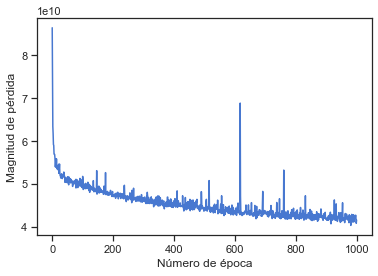

In [52]:
import matplotlib.pyplot as plt
plt.xlabel('Número de época')
plt.ylabel("Magnitud de pérdida")
plt.plot(hist.history['loss'])

In [51]:
X = data_f.drop(["price","date"],axis=1).values
y = data_f["price"].values
print("Entrada: ",X.shape)
print("Salida: ",y.shape)

Entrada:  (21612, 15)
Salida:  (21612,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)

In [55]:
print('Reconstrucción de regresión polinomial')
mean_squared_error=metrics.mean_squared_error(y_test,polypred)
print('Error medio cuadrado (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-cuadrado (entrenamiento) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-cuadrado (prueba) ', round(poly.score(xtest_poly, y_test), 3))

Reconstrucción de regresión polinomial
Error medio cuadrado (MSE)  195054.89
R-cuadrado (entrenamiento)  0.752
R-cuadrado (prueba)  0.727
